In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

url = "https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/Housing.csv"
hf = pd.read_csv(url)

# **Pre-processing and Training**


> **Separating desired Features and Outputs**


In [3]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y = hf.pop('price')
x = hf[features].values

t_un = torch.tensor(StandardScaler().fit_transform(x), dtype=torch.float32)
t_u = torch.tensor(x, dtype=torch.float32)
t_c = torch.tensor(y, dtype=torch.float32)


> **Splitting Training and Validation Set**


In [4]:
samples = t_un.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_un_train = t_un[train_idx]
t_un_valid = t_un[valid_idx]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]



> **Linear Regression Training**




In [5]:
def lin_model(t_u, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_u, params[:-1]) + params[-1]

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss}, \tValidation Loss: {valid_loss}')
  return params, train_losses, valid_losses


# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [7]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 1000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 1500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 2000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 2500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 3000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 3500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 4000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 4500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 5000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0


> *Trained with LR of* ***1e-2***

In [8]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 1602336325632.0, 	Validation Loss: 1281815347200.0
Epochs: 1000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 1500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 2000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 2500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 3000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 3500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 4000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 4500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0
Epochs: 5000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281818361856.0


> *Trained with LR of* ***1e-3***

In [9]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 4849758896128.0, 	Validation Loss: 3371920261120.0
Epochs: 1000, 	Training Loss: 2046770282496.0, 	Validation Loss: 1300794441728.0
Epochs: 1500, 	Training Loss: 1665686044672.0, 	Validation Loss: 1188045783040.0
Epochs: 2000, 	Training Loss: 1611953733632.0, 	Validation Loss: 1234045632512.0
Epochs: 2500, 	Training Loss: 1603962011648.0, 	Validation Loss: 1262831534080.0
Epochs: 3000, 	Training Loss: 1602656010240.0, 	Validation Loss: 1274922663936.0
Epochs: 3500, 	Training Loss: 1602409725952.0, 	Validation Loss: 1279474401280.0
Epochs: 4000, 	Training Loss: 1602354675712.0, 	Validation Loss: 1281092878336.0
Epochs: 4500, 	Training Loss: 1602340519936.0, 	Validation Loss: 1281639186432.0
Epochs: 5000, 	Training Loss: 1602336325632.0, 	Validation Loss: 1281792016384.0


> *Trained with LR of* ***1e-4***

In [10]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 22124848742400.0, 	Validation Loss: 18722819407872.0
Epochs: 1000, 	Training Loss: 18230294872064.0, 	Validation Loss: 15175407108096.0
Epochs: 1500, 	Training Loss: 15099767029760.0, 	Validation Loss: 12343371104256.0
Epochs: 2000, 	Training Loss: 12575963086848.0, 	Validation Loss: 10078432264192.0
Epochs: 2500, 	Training Loss: 10536128348160.0, 	Validation Loss: 8264775892992.0
Epochs: 3000, 	Training Loss: 8883913359360.0, 	Validation Loss: 6811436449792.0
Epochs: 3500, 	Training Loss: 7543167909888.0, 	Validation Loss: 5646510981120.0
Epochs: 4000, 	Training Loss: 6453463089152.0, 	Validation Loss: 4712949088256.0
Epochs: 4500, 	Training Loss: 5566595334144.0, 	Validation Loss: 3965278486528.0
Epochs: 5000, 	Training Loss: 4843987009536.0, 	Validation Loss: 3367148978176.0


# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [11]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 24317693788160.0, 	Validation Loss: 20742569721856.0
Epochs: 1000, 	Training Loss: 21923002056704.0, 	Validation Loss: 18567225409536.0
Epochs: 1500, 	Training Loss: 19723668422656.0, 	Validation Loss: 16578156429312.0
Epochs: 2000, 	Training Loss: 17704071200768.0, 	Validation Loss: 14760632385536.0
Epochs: 2500, 	Training Loss: 15851525767168.0, 	Validation Loss: 13102681686016.0
Epochs: 3000, 	Training Loss: 14155835768832.0, 	Validation Loss: 11594651140096.0
Epochs: 3500, 	Training Loss: 12608796098560.0, 	Validation Loss: 10228738293760.0
Epochs: 4000, 	Training Loss: 11203738861568.0, 	Validation Loss: 8998540541952.0
Epochs: 4500, 	Training Loss: 9935110799360.0, 	Validation Loss: 7898661388288.0
Epochs: 5000, 	Training Loss: 8798080073728.0, 	Validation Loss: 6924327190528.0


> *Trained with LR of* ***1e-2***

In [12]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 26650842497024.0, 	Validation Loss: 22870080094208.0
Epochs: 1000, 	Training Loss: 26382188937216.0, 	Validation Loss: 22624740573184.0
Epochs: 1500, 	Training Loss: 26115628335104.0, 	Validation Loss: 22381399638016.0
Epochs: 2000, 	Training Loss: 25851049541632.0, 	Validation Loss: 22139960819712.0
Epochs: 2500, 	Training Loss: 25588349796352.0, 	Validation Loss: 21900325552128.0
Epochs: 3000, 	Training Loss: 25327441018880.0, 	Validation Loss: 21662424629248.0
Epochs: 3500, 	Training Loss: 25068277071872.0, 	Validation Loss: 21426190942208.0
Epochs: 4000, 	Training Loss: 24810784555008.0, 	Validation Loss: 21191582547968.0
Epochs: 4500, 	Training Loss: 24554946691072.0, 	Validation Loss: 20958567989248.0
Epochs: 5000, 	Training Loss: 24300723634176.0, 	Validation Loss: 20727126294528.0


> *Trained with LR of* ***1e-3***

In [13]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 26894040825856.0, 	Validation Loss: 23092248182784.0
Epochs: 1000, 	Training Loss: 26866874318848.0, 	Validation Loss: 23067426291712.0
Epochs: 1500, 	Training Loss: 26839728783360.0, 	Validation Loss: 23042627469312.0
Epochs: 2000, 	Training Loss: 26812604219392.0, 	Validation Loss: 23017845424128.0
Epochs: 2500, 	Training Loss: 26785494335488.0, 	Validation Loss: 22993080156160.0
Epochs: 3000, 	Training Loss: 26758409617408.0, 	Validation Loss: 22968337956864.0
Epochs: 3500, 	Training Loss: 26731339579392.0, 	Validation Loss: 22943606243328.0
Epochs: 4000, 	Training Loss: 26704286318592.0, 	Validation Loss: 22918893404160.0
Epochs: 4500, 	Training Loss: 26677245640704.0, 	Validation Loss: 22894195245056.0
Epochs: 5000, 	Training Loss: 26650223837184.0, 	Validation Loss: 22869511766016.0


> *Trained with LR of* ***1e-4***

In [14]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 26918462160896.0, 	Validation Loss: 23114561880064.0
Epochs: 1000, 	Training Loss: 26915740057600.0, 	Validation Loss: 23112076754944.0
Epochs: 1500, 	Training Loss: 26913017954304.0, 	Validation Loss: 23109591629824.0
Epochs: 2000, 	Training Loss: 26910302142464.0, 	Validation Loss: 23107106504704.0
Epochs: 2500, 	Training Loss: 26907577942016.0, 	Validation Loss: 23104623476736.0
Epochs: 3000, 	Training Loss: 26904862130176.0, 	Validation Loss: 23102136254464.0
Epochs: 3500, 	Training Loss: 26902140026880.0, 	Validation Loss: 23099651129344.0
Epochs: 4000, 	Training Loss: 26899422117888.0, 	Validation Loss: 23097166004224.0
Epochs: 4500, 	Training Loss: 26896700014592.0, 	Validation Loss: 23094680879104.0
Epochs: 5000, 	Training Loss: 26893984202752.0, 	Validation Loss: 23092199948288.0


# **Linear Regression Loss Plots**

>**SGD Optimized Linear Model**

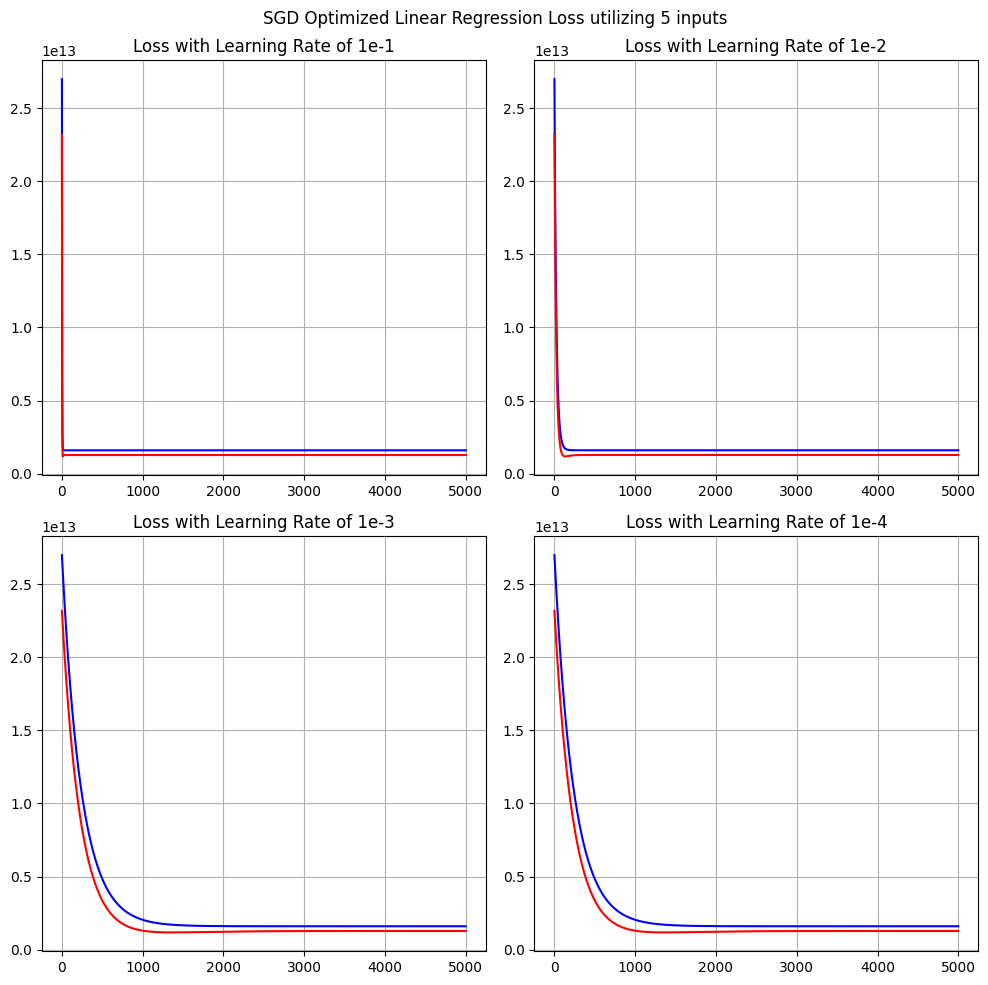

Learning rate of 0.1
Epochs: 500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 1000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 1500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 2000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 2500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 3000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 3500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 4000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 4500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 5000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Best parameters for learning rate 0.1: [ 723219.94  146649.8   526873.44  508651.72  315194.84 4835092.  ]
Learning rate of 0.01
Epochs: 500, 	Training Loss: 160233632563

In [17]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimized Linear Regression Loss utilizing 5 inputs')

plt.subplot(2,2,1)
plt.plot(SGD_trainLoss1, color='blue')
plt.plot(SGD_validLoss1, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.plot(SGD_trainLoss2, color='blue')
plt.plot(SGD_validLoss2, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()

# Training with different learning rates and retrieving the best parameters
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]
best_params = {}

for lr in learning_rates:
    params = torch.tensor([1.0] * 6, requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    print(f'Learning rate of {lr}')
    model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
    best_params[lr] = params.detach().numpy()
    print(f'Best parameters for learning rate {lr}: {best_params[lr]}')

# Displaying the best parameters for each learning rate
for lr, params in best_params.items():
    print(f'Learning Rate: {lr}, Best Parameters: {params}')



> **Adam Optimized Linear Model**



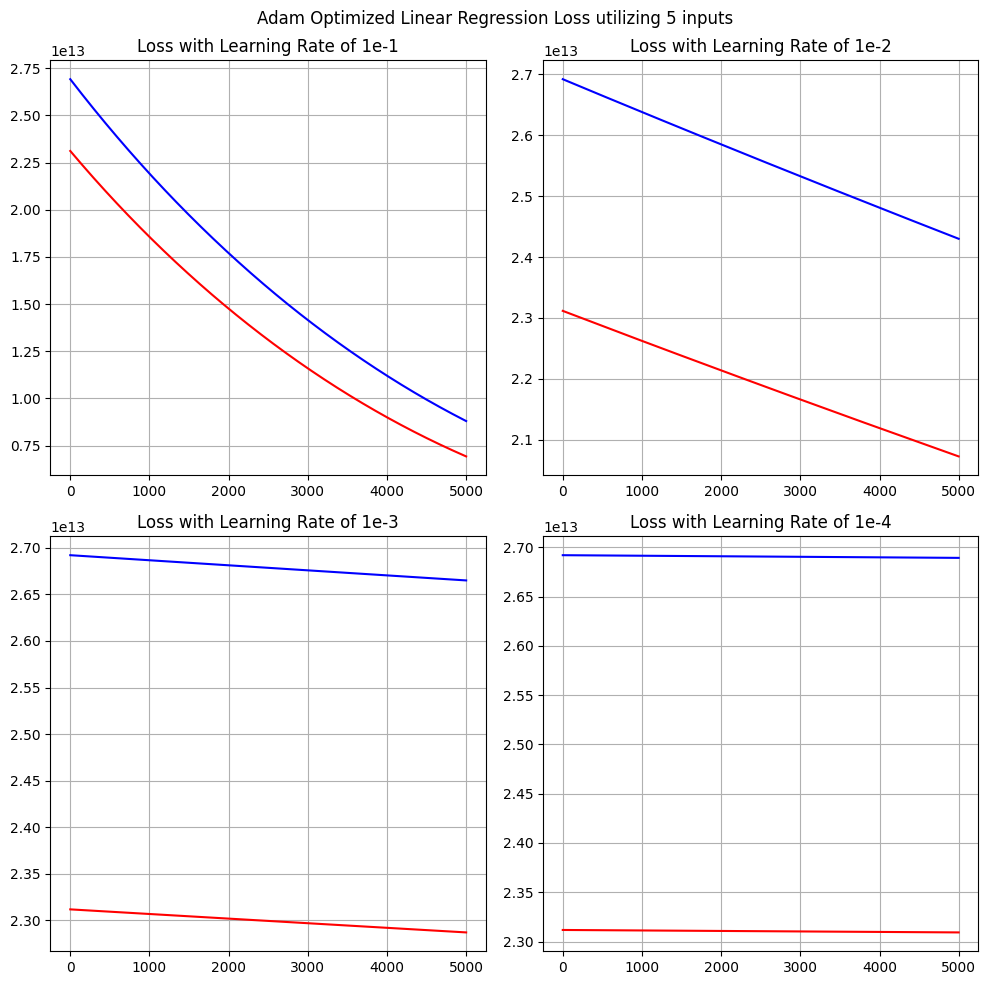

Learning rate of 0.1
Epochs: 500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 1000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 1500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 2000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 2500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 3000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 3500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 4000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 4500, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Epochs: 5000, 	Training Loss: 1602334621696.0, 	Validation Loss: 1281825701888.0
Best parameters for learning rate 0.1: [ 723219.94  146649.8   526873.44  508651.72  315194.84 4835092.  ]
Learning rate of 0.01
Epochs: 500, 	Training Loss: 160233632563

In [16]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimized Linear Regression Loss utilizing 5 inputs')

plt.subplot(2,2,1)
plt.grid(True)
plt.plot(adam_trainLoss1, color='blue')
plt.plot(adam_validLoss1, color='red')
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.grid(True)
plt.plot(adam_trainLoss2, color='blue')
plt.plot(adam_validLoss2, color='red')
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.grid(True)
plt.plot(adam_trainLoss3, color='blue')
plt.plot(adam_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.grid(True)
plt.plot(adam_trainLoss4, color='blue')
plt.plot(adam_validLoss4, color='red')
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()

# Training with different learning rates and retrieving the best parameters
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]
best_params = {}

for lr in learning_rates:
    params = torch.tensor([1.0] * 6, requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    print(f'Learning rate of {lr}')
    model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
    best_params[lr] = params.detach().numpy()
    print(f'Best parameters for learning rate {lr}: {best_params[lr]}')

# Displaying the best parameters for each learning rate
for lr, params in best_params.items():
    print(f'Learning Rate: {lr}, Best Parameters: {params}')